In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

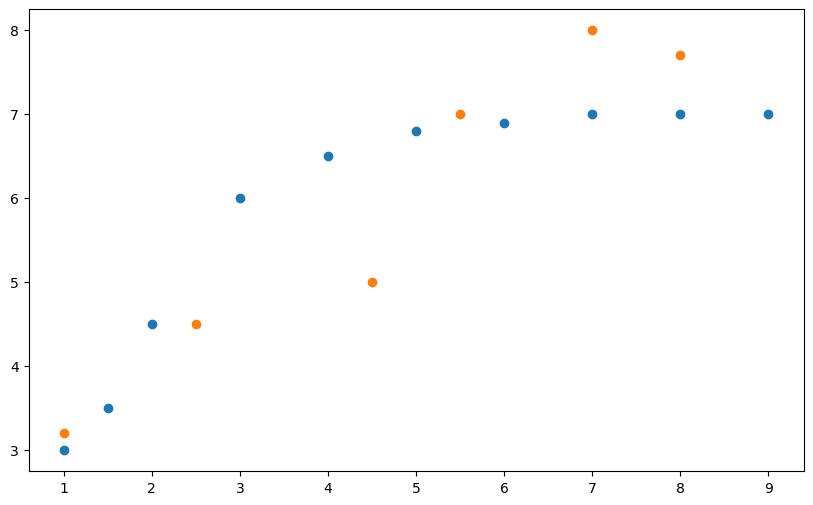

In [2]:
#create dataset
x_train = np.array([1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9])
y_train = np.array([3, 3.5, 4.5, 6, 6.5, 6.8, 6.9, 7, 7, 7])

x_test = np.array([1, 2.5, 4.5, 5.5, 7, 8])
y_test = np.array([3.2, 4.5, 5, 7, 8, 7.7])

plt.figure(figsize=(10, 6))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.show()

In [3]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [54]:
class PolyLinearRegression:
    def __init__(self,l_rate=0.001,iteration=10000,degree=2,lambda_value=0.2):
        self.lambda_value=lambda_value
        self.l_rate=l_rate
        self.iteration=iteration
        self.degree=degree

    def scale(self, x):  #features scaling using z-score
        x_scaled = x - np.mean(x, axis=0)
        x_scaled = x_scaled / np.std(x_scaled, axis=0)
        return x_scaled
    def transformer(self,x):
        self.n=x.shape[0]
        
        x_transformed=np.empty((self.n,0))

        for j in range(self.degree+1):
            if j!=0:
                x_power=np.power(x,j)
                x_transformed=np.append(x_transformed,x_power,axis=1)
        return x_transformed
    
    def fit(self,X,y):
        self.cost=[]
        self.theta=np.zeros((1+self.degree))
        X=self.scale(X)
        x_p=self.transformer(X)
        for i in range(self.iteration):
            y_pred=self.theta[0]+np.dot(x_p,self.theta[1:])
            l2=self.lambda_value*np.sum(np.square(self.theta[1:]))
            mse=(1/2*self.n)* np.sum((y_pred-y)**2)+l2
            self.cost.append(mse)

            d_theta1=(2/self.n)* np.dot(x_p.T,(y_pred-y)) - l2
            d_theta0=(2/self.n) * np.sum(y_pred-y)

            self.theta[1:]=self.theta[1:]-self.l_rate*d_theta1
            self.theta[0]=self.theta[0]-self.l_rate*d_theta0
        return self
        
    def predict(self, x):  
        
        x = self.scale(x)  #preprocessing step 1
        x_p = self.transformer(x)  #preprocessing step 2
        
        return self.theta[0] + np.dot(x_p, self.theta[1:])

In [55]:
plr=PolyLinearRegression()
plr.fit(x_train,y_train)

In [56]:
plr.theta

array([ 6.29982622,  1.65395136, -0.48209541])

In [57]:
#predict the training examples
y_pred_train_poly = plr.predict(x_train)
y_pred_test_poly = plr.predict(x_test)

#evaluate the learning model using training data
mse_train = (1/x_train.shape[0]) * np.sum((y_pred_train_poly - y_train)**2)
rmse_train = np.sqrt(mse_train)

#evaluate the learning model using testing data
mse_test = (1/x_test.shape[0]) * np.sum((y_pred_test_poly - y_test)**2)
rmse_test = np.sqrt(mse_test)

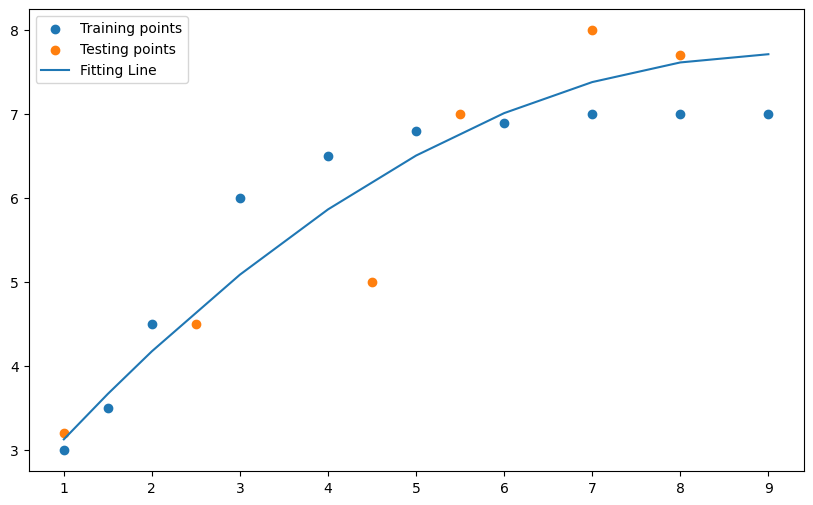

RMSE Train =  0.5012617237954055
RMSE Test =  0.5841235962969944


In [58]:
#Plot the results:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training points')
plt.scatter(x_test, y_test, label='Testing points')
plt.plot(x_train, y_pred_train_poly, label='Fitting Line')
plt.legend(loc='upper left')
plt.show()
print ("RMSE Train = ", rmse_train)
print ("RMSE Test = ", rmse_test)